In [80]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
from scipy import stats
from sklearn.externals.six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sample = pd.read_csv('sample')

In [6]:
sample.columns

Index(['Unnamed: 0', 'date_time', 'site_name', 'posa_continent',
       'user_location_country', 'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [7]:
sample.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,...,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,...,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,...,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,...,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,...,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,...,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [8]:
sample.head(5)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


In [19]:
sample['user_location_city'].nunique()

10779

In [21]:
# set display right
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 200)

In [22]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
Unnamed: 0                   100000 non-null int64
date_time                    100000 non-null object
site_name                    100000 non-null int64
posa_continent               100000 non-null int64
user_location_country        100000 non-null int64
user_location_region         100000 non-null int64
user_location_city           100000 non-null int64
orig_destination_distance    63915 non-null float64
user_id                      100000 non-null int64
is_mobile                    100000 non-null int64
is_package                   100000 non-null int64
channel                      100000 non-null int64
srch_ci                      99878 non-null object
srch_co                      99878 non-null object
srch_adults_cnt              100000 non-null int64
srch_children_cnt            100000 non-null int64
srch_rm_cnt                  100000 non-null int64
srch_destination_id  

In [25]:
sample.dtypes

Unnamed: 0                     int64
date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
user_id                        int64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_ci                       object
srch_co                       object
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id       int64
is_booking                     int64
cnt                            int64
hotel_continent                int64
hotel_country                  int64
hotel_market                   int64
hotel_cluster                  int64
dtype: object

In [26]:
sample.shape

(100000, 25)

In [39]:
for col in sample:
    print (col ,':', sample[col].nunique())

Unnamed: 0 : 100000
date_time : 99886
site_name : 41
posa_continent : 5
user_location_country : 201
user_location_region : 779
user_location_city : 10779
orig_destination_distance : 62206
user_id : 88863
is_mobile : 2
is_package : 2
channel : 11
srch_ci : 1066
srch_co : 1068
srch_adults_cnt : 10
srch_children_cnt : 10
srch_rm_cnt : 9
srch_destination_id : 8827
srch_destination_type_id : 8
is_booking : 2
cnt : 32
hotel_continent : 7
hotel_country : 178
hotel_market : 1843
hotel_cluster : 100


In [40]:
pd.crosstab(sample['is_booking'], sample['srch_rm_cnt'])

srch_rm_cnt,0,1,2,3,4,5,6,7,8
is_booking,,,,,,,,,
0,0,84425,6091,975,253,108,61,29,65
1,1,7248,580,102,42,9,6,1,4


In [41]:
pd.pivot_table(sample,index=['hotel_continent'])

,Unnamed: 0,channel,cnt,hotel_cluster,hotel_country,hotel_market,is_booking,is_mobile,is_package,orig_destination_distance,posa_continent,site_name,srch_adults_cnt,srch_children_cnt,srch_destination_id,srch_destination_type_id,srch_rm_cnt,user_id,user_location_city,user_location_country,user_location_region
hotel_continent,,,,,,,,,,,,,,,,,,,,,
0,1.885889e+07,5.538985,1.461538,54.118786,66.694924,792.026688,0.078493,0.102564,0.230769,3884.079871,3.229723,13.912088,2.051805,0.295657,16643.555207,2.581894,1.100471,653161.092622,29761.507588,97.602302,532.118263
1,1.137680e+07,5.000000,1.000000,30.000000,16.000000,320.000000,1.000000,0.000000,0.000000,NaN,4.000000,30.000000,2.000000,0.000000,15271.000000,5.000000,2.000000,564498.000000,47020.000000,195.000000,991.000000
2,1.878723e+07,6.000438,1.447267,49.212931,63.181650,629.382632,0.091520,0.143692,0.178149,1032.483032,2.874765,6.909888,2.044980,0.393478,14278.056700,2.734650,1.105124,599239.511711,27735.185227,89.638792,301.590882
3,1.865506e+07,5.518618,1.527046,49.786623,119.881474,423.257202,0.065354,0.109409,0.237895,6587.346927,2.400935,17.086347,1.922081,0.220273,14323.966519,2.276586,1.124732,628839.307999,25554.305164,75.259884,236.025743
4,1.895955e+07,5.878173,1.617278,56.735985,66.371892,853.028334,0.048696,0.158565,0.578373,1983.584126,2.856685,5.026428,2.078503,0.358981,12312.965081,2.195390,1.093926,592494.314791,28719.973313,91.552119,320.597089
5,1.877567e+07,5.988671,1.552008,54.742533,143.421215,956.906282,0.073120,0.119464,0.314109,6268.123455,2.223481,13.888774,1.941298,0.273944,18775.949537,2.434604,1.131823,604664.355304,29279.255407,91.047374,336.764161
6,1.895873e+07,5.720439,1.494316,46.994641,109.744478,450.452146,0.077428,0.112936,0.246657,3874.407379,2.207893,15.003305,1.988781,0.257725,15681.275054,2.586768,1.131066,609412.041168,28027.123404,78.847398,344.944208


In [46]:
pd.pivot_table(sample, index = ['is_booking'], columns = ['srch_rm_cnt'],values=['site_name'])

site_name                                                                                       
srch_rm_cnt         0         1          2          3          4          5          6          7          8
is_booking                                                                                                  
0                 NaN  9.844217  10.125595  10.873846  11.569170  11.675926  11.377049  13.827586  14.430769
1                 2.0  9.330298   8.287931  10.127451  12.428571  17.888889   5.333333   2.000000  19.000000

In [47]:
sample.groupby('srch_rm_cnt')['is_booking'].mean()

srch_rm_cnt
0    1.000000
1    0.079064
2    0.086943
3    0.094708
4    0.142373
5    0.076923
6    0.089552
7    0.033333
8    0.057971
Name: is_booking, dtype: float64

In [48]:
sample['srch_children_cnt'].corr(sample['is_booking'])

-0.023228499097508216

In [50]:
#pairwise correlation of columns 
sample.corr()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
Unnamed: 0,1.000000,0.005119,-0.000626,0.001028,0.000501,-0.002442,-0.003072,0.010300,-0.006413,-0.000838,-0.000163,-0.003140,0.000239,-0.004142,0.001031,-0.003505,-0.002716,-0.004491,0.006402,0.003373,0.004371,-0.005887
site_name,0.005119,1.000000,-0.637743,0.159283,0.130818,-0.013471,0.027609,0.030404,-0.005418,0.048820,-0.027780,-0.013405,-0.031962,0.016585,0.034895,-0.006934,-0.013460,0.022274,0.201760,0.263167,-0.068316,-0.026689
posa_continent,-0.000626,-0.637743,1.000000,0.179726,-0.034647,0.039227,0.049808,-0.015209,0.016331,-0.093459,0.089680,0.012350,0.034453,-0.033712,-0.015535,0.037172,0.013319,-0.018952,-0.333578,-0.156578,0.049214,0.018297
user_location_country,0.001028,0.159283,0.179726,1.000000,0.058496,0.122686,0.047689,-0.021091,0.003728,-0.025284,0.109999,0.042526,0.037101,0.000858,0.013486,0.028888,0.001284,0.003539,-0.063744,0.097624,0.015569,-0.011876
user_location_region,0.000501,0.130818,-0.034647,0.058496,1.000000,0.132457,0.136560,0.002225,0.016982,0.040482,-0.001600,0.005487,0.014009,0.000254,0.022567,0.001376,0.000253,-0.007570,0.043027,-0.050301,0.040367,0.004984
user_location_city,-0.002442,-0.013471,0.039227,0.122686,0.132457,1.000000,0.014178,-0.007989,-0.003741,0.013032,0.023497,0.006628,0.002638,-0.000694,0.000786,-0.004399,-0.002655,-0.002175,0.007759,-0.001987,0.008558,0.000102
orig_destination_distance,-0.003072,0.027609,0.049808,0.047689,0.136560,0.014178,1.000000,0.017015,-0.059464,0.041991,-0.000398,-0.024039,-0.059722,-0.012484,-0.036314,-0.042859,-0.033480,0.009483,0.416180,0.254321,-0.090112,0.003624
user_id,0.010300,0.030404,-0.015209,-0.021091,0.002225,-0.007989,0.017015,1.000000,-0.011439,-0.018901,-0.003593,-0.007370,0.002983,-0.001625,0.002716,0.007133,0.001561,0.001355,0.002447,0.008707,-0.002463,0.003202
is_mobile,-0.006413,-0.005418,0.016331,0.003728,0.016982,-0.003741,-0.059464,-0.011439,1.000000,0.046903,-0.030770,0.016661,0.018211,-0.022565,-0.007140,-0.016039,-0.028623,0.008084,-0.024144,-0.029574,0.007644,0.012145
is_package,-0.000838,0.048820,-0.093459,-0.025284,0.040482,0.013032,0.041991,-0.018901,0.046903,1.000000,-0.011269,-0.024097,-0.037673,-0.036653,-0.146647,-0.224422,-0.081307,0.126500,0.108993,-0.044426,-0.014636,0.031399


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1114dd9b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112017898>]], dtype=object)

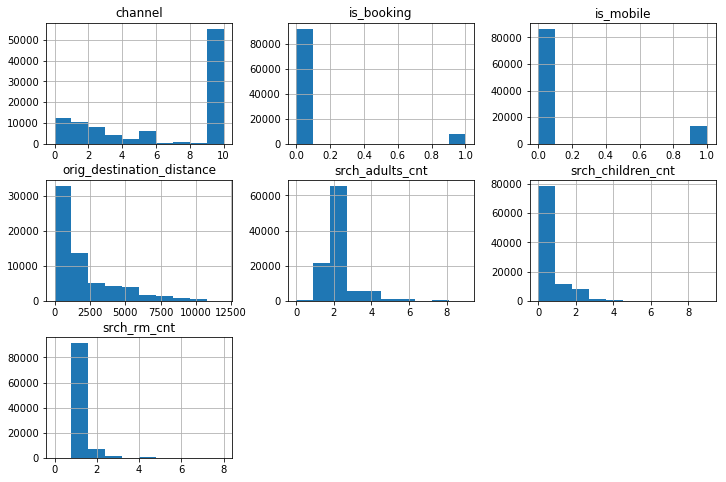

In [55]:
# sample.hist()
sample[['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 
        'srch_adults_cnt', 'srch_children_cnt']].hist(figsize=(12,8))

In [56]:
# distribution of number of booking attempts
sample.groupby('user_id')['is_booking']\
   .agg({'num_of_bookings':'count'}).reset_index()\
   .groupby('num_of_bookings')['user_id']\
   .agg('count')

num_of_bookings
1    79189
2     8423
3     1065
4      161
5       24
6        1
Name: user_id, dtype: int64

In [57]:
sample = sample.merge(sample.groupby('user_id')['is_booking']
    .agg(['count']).reset_index())

In [58]:
sample.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,2
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,1,9,2014-08-26,2014-08-31,1,0,1,8286,1,0,1,0,63,1258,14,2
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37,1
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22,1
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42,2


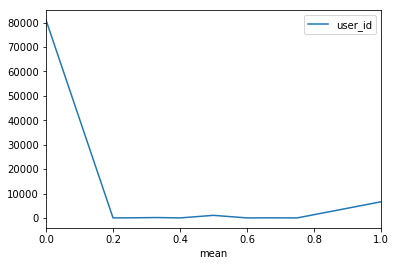

In [59]:
# distribution of booking rate
sample.groupby('user_id')['is_booking']\
   .agg(['mean']).reset_index()\
   .groupby('mean')['user_id']\
   .agg('count')

(sample.groupby('user_id')['is_booking']\
   .agg(['mean']).reset_index()\
   .groupby('mean')['user_id']\
   .agg('count').reset_index()).plot(x='mean', y='user_id')

## explore the data - validate data

In [60]:
#number of guests need to be > 0
pd.crosstab(sample['srch_adults_cnt'], sample['srch_children_cnt'])
sample.drop(sample[sample['srch_adults_cnt'] + sample['srch_children_cnt']==0].index)

sample['srch_co'] = pd.to_datetime(sample['srch_co'])
sample['srch_ci'] = pd.to_datetime(sample['srch_ci'])
sample['date_time'] = pd.to_datetime(sample['date_time'])
sample['date'] = pd.to_datetime(sample['date_time'].apply(lambda x: x.date()))

In [61]:
# Check-out date need to be later than check-in date;
# Check-in date need to be later than booking date

sample[sample['srch_co'] < sample['srch_ci']][['srch_co', 'srch_ci']]
sample[sample['srch_ci'] < sample['date']][['srch_ci', 'date']]

,srch_ci,date
7138,2014-01-05,2014-01-07
14931,2014-10-13,2014-10-14
18778,2014-06-11,2014-11-10
22722,2014-02-11,2014-10-09
25886,2014-03-10,2014-09-15
26795,2014-09-12,2014-12-02
29591,2014-08-02,2014-08-23
33886,2013-01-16,2013-01-17
33887,2014-03-03,2014-03-04
33888,2013-01-21,2013-01-22


## explore the data - create new variables that might be useufl

In [62]:
def duration(row):
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    if delta <= 0:
        return np.nan
    else:
        return delta

def days_in_advance(row):
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta


In [63]:
sample['duration'] = sample.apply(duration, axis=1)
sample['days_in_advance'] = sample.apply(days_in_advance, axis=1)

## Outperforming/underperforming segments

In [64]:
cat_list = ['site_name', 'posa_continent',
       'user_location_country', 'user_location_region',
       'user_location_city', 'channel',
       'srch_destination_id', 'srch_destination_type_id',
        'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster']

# for all columns
for i in cat_list:
    print(sample.groupby(i)['is_booking']
          .agg({'booking_rate': 'mean', 'num_of_bookings': 'sum'})
          .reset_index()
          .sort_values(by='booking_rate'))

# booking rate per channel
sample.groupby('channel')['is_booking']\
    .agg({'booking_rate': 'mean', 'num_of_bookings': 'sum'})\
    .reset_index()\
    .sort_values(by='booking_rate')

sample['is_booking'].mean()

    site_name  booking_rate  num_of_bookings
35         44      0.000000                0
10         16      0.000000                0
29         35      0.025271                7
27         33      0.036170               17
12         18      0.036603               25
1           6      0.037037                2
39         48      0.039216                2
15         21      0.041667                2
30         36      0.042017                5
26         32      0.050000               12
19         25      0.052727               29
37         46      0.054945                5
21         27      0.059259               16
13         19      0.060606                2
3           8      0.061489              152
8          14      0.062500                9
20         26      0.062814               25
17         23      0.064024              126
2           7      0.064935                5
33         40      0.065217                9
18         24      0.066398              428
5         

0.07993

##  Outperforming/underperforming segments - two sample t test 

In [65]:
def stats_comparison(i):
    sample.groupby(i)['is_booking'].agg({
    'average': 'mean',
    'bookings': 'count'
    }).reset_index()
    cat = sample.groupby(i)['is_booking']\
        .agg({
            'sub_average': 'mean',
            'sub_bookings': 'count'
       }).reset_index()
    cat['overall_average'] = sample['is_booking'].mean()
    cat['overall_bookings'] = sample['is_booking'].count()
    cat['rest_bookings'] = cat['overall_bookings'] - cat['sub_bookings']
    cat['rest_average'] = (cat['overall_bookings']*cat['overall_average'] \
                     - cat['sub_bookings']*cat['sub_average'])/cat['rest_bookings']
    cat['z_score'] = (cat['sub_average']-cat['rest_average'])/\
        np.sqrt(cat['overall_average']*(1-cat['overall_average'])
            *(1/cat['sub_bookings']+1/cat['rest_bookings']))
    cat['prob'] = np.around(stats.norm.cdf(cat.z_score), decimals = 10)
    cat['significant'] = [(lambda x: 1 if x > 0.9 else -1 if x < 0.1 else 0)(i) for i in cat['prob']]
    print(cat)

In [66]:
stats_comparison('user_location_city')

       user_location_city  sub_average  sub_bookings  overall_average  overall_bookings  rest_bookings  rest_average   z_score      prob  significant
0                       0     0.000000             4          0.07993            100000          99996      0.079933 -0.589499  0.277763            0
1                       1     0.000000             2          0.07993            100000          99998      0.079932 -0.416835  0.338400            0
2                       3     0.235294            17          0.07993            100000          99983      0.079904  2.362364  0.990921            1
3                       7     0.000000             1          0.07993            100000          99999      0.079931 -0.294745  0.384094            0
4                       8     0.000000             1          0.07993            100000          99999      0.079931 -0.294745  0.384094            0
5                      14     0.000000             4          0.07993            100000          999

## # clustering - what are the similar user cities? 

Step 1: what are the features I am going to use (that make sense)?
What features may distinguish cities? based on business sense and exploratory analysis

In [67]:
num_list = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']
city_data = sample.dropna(axis=0)[num_list + ['user_location_city']]
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)

Step 2: shall I standardise the data?
What is the magnitude of data range?

In [68]:
city_groups_std = city_groups.copy()
for i in num_list:
    city_groups_std[i] = preprocessing.scale(city_groups_std[i])


Step 3: select clustering method and number of clusters

The Elbow methods? choose a K so that the sum of the square error of the distances decrease drastically

using an ad-hoc k=3 here, there are methods to help derive the optimal number for k

In [69]:
km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[num_list])

Dimention reduction Principal Component Analysis

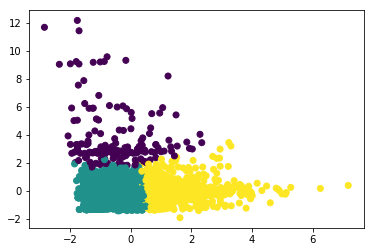

In [76]:
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(city_groups[num_list])
city_groups_std['x'] = pca.fit_transform(city_groups_std[num_list])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[num_list])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.figure(figsize=(14,8))
plt.show()

Step 4: profile the cluster 

merging the two dataframes based on a common column user_location_city

In [77]:
city_groups.merge(city_groups_std[['user_location_city', 'cluster']])\
    .groupby('cluster')\
    .mean() # for every column

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,30907.850932,3.042961,55.256884,1540.887311,0.136077,0.187474,4.189130,0.562474,2.447412
1,28042.830281,2.754668,41.145611,1347.123366,0.143644,0.177620,1.982838,0.367094,1.072500
2,28979.252285,5.267879,102.022495,3178.690926,0.108672,0.480847,2.013434,0.322702,1.068302


Step 5: assess the statistical robustness

A statistically robust segmentation return similar results using different clustering methodologies

# decision tree - what lead to a higher chance of booking for individuals?

In [78]:
# decision tree - what lead to a higher chance of booking for individuals?
# choose a cluster and split them into test and train
sample = sample.merge(city_groups_std[['user_location_city', 'cluster']], left_on='user_location_city', right_on='user_location_city', how='outer')
sample.groupby('cluster')['is_booking'].count()

cluster
0.0      328
1.0    62143
2.0     7110
Name: is_booking, dtype: int64

In [84]:
# choose one of the city clusters to analyze
from ipykernel import kernelapp as app
from sklearn.model_selection import train_test_split
tree_data = sample.dropna(axis = 0)[sample['cluster']==2]
tree_train, tree_test = train_test_split(tree_data, test_size=0.2, random_state=1, stratify=tree_data['is_booking'])

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [85]:
# build the decision tree model
clf = tree.DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=200)
clf = clf.fit(tree_train[num_list], tree_train['is_booking'])


In [86]:
# test_preds = clf.predict(X = tree_test[num_list])
# clf.predict_proba(tree_test[num_list])

# scoring of the prediction model
clf.score(tree_test[num_list], tree_test['is_booking'])

# visualize the decision tree
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names =['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt'], filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("booking_tree.pdf")

NameError: name 'pydot' is not defined

# Logistic regression - what lead to a higher chance of booking for individuals?

In [87]:
#create dummy variable channel
sample['channel'].value_counts()
sample['new_channel'] = [i if i in [9, 0, 1, 2] else 'other' for i in sample['channel']]
dummy_channels = pd.get_dummies(sample['new_channel'], prefix='channel')
sample = sample.join(dummy_channels.ix[:, :])
sample['log_orig_destination_distance'] = [np.log(i) for i in sample['orig_destination_distance']]

var_list = ['duration', 'days_in_advance', 'log_orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'channel_1',
            'channel_2', 'channel_9', 'channel_other']

In [88]:
# create logistic estimator
logit = sm.Logit(sample['is_booking'], sample[var_list], missing='drop')
result = logit.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.277711
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_booking   No. Observations:                63587
Model:                          Logit   Df Residuals:                    63575
Method:                           MLE   Df Model:                           11
Date:                Mon, 03 Jul 2017   Pseudo R-squ.:                 0.03220
Time:                        23:22:04   Log-Likelihood:                -17659.
converged:                       True   LL-Null:                       -18246.
                                        LLR p-value:                3.549e-245
=================================================================================================
                                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
duration                         -0.1939      0.010    -20.121      0.000        -0.213    -0.175
days_in_advance                  -0.0033      0.000    -10.065      0.000        -0.004    -0.003
log_orig_destination_distance    -0.0872      0.007    -13.263      0.000        -0.100    -0.074
is_mobile                        -0.3966      0.047     -8.396      0.000        -0.489    -0.304
is_package                       -0.3893      0.046     -8.507      0.000        -0.479    -0.300
srch_adults_cnt                  -0.3655      0.020    -18.243      0.000        -0.405    -0.326
srch_children_cnt                -0.1235      0.022     -5.686      0.000        -0.166    -0.081
srch_rm_cnt                       0.0190      0.037      0.514      0.608        -0.053     0.091
channel_1                        -0.4677      0.060     -7.755      0.000        -0.586    -0.349
channel_2                        -0.6094      0.068     -9.019      0.000        -0.742    -0.477
channel_9                        -0.3005      0.037     -8.163      0.000        -0.373    -0.228
channel_other                    -0.2038      0.053     -3.815      0.000        -0.309    -0.099
=================================================================================================
"""

In [89]:
# convert logit to odds ratio
np.exp(result.params)
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
duration,0.808313,0.839434,0.823727
days_in_advance,0.996095,0.997367,0.996731
log_orig_destination_distance,0.904742,0.928367,0.916479
is_mobile,0.613113,0.737839,0.672591
is_package,0.619419,0.741119,0.677542
srch_adults_cnt,0.667124,0.721632,0.693843
srch_children_cnt,0.847003,0.922264,0.883833
srch_rm_cnt,0.948031,1.095565,1.019132
channel_1,0.556636,0.705072,0.626473
channel_2,0.476240,0.620657,0.543675


In [90]:
# predicted values
sample['pred'] = result.predict(sample[var_list])


In [91]:
# plot variable VS. marketing_channel
sample.groupby('channel')['is_booking'].mean()

channel
0     0.071948
1     0.069690
2     0.060490
3     0.060400
4     0.120784
5     0.094349
6     0.067901
7     0.043157
8     0.055351
9     0.085381
10    0.200000
Name: is_booking, dtype: float64

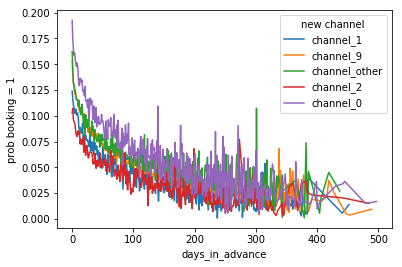

In [102]:

def plot_vs_marketing_channel(variable):
    grouped = pd.pivot_table(sample[(sample['pred'].isnull() == False)], values = ['pred'], index=[variable, 'new_channel'], aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in sample.new_channel.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['pred'])
      
    pl.xlabel(variable)
    pl.ylabel('prob booking = 1')
    
    pl.legend(['channel_'+str(i) for i in list(sample.new_channel.unique())], loc='upper right', title='new channel')
    # pl.show()
plot_vs_marketing_channel('days_in_advance')
